<a href="https://colab.research.google.com/github/aniketmishr/ml-tutorial/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_blobs(n_samples = 1000, centers = 2, random_state  =0)

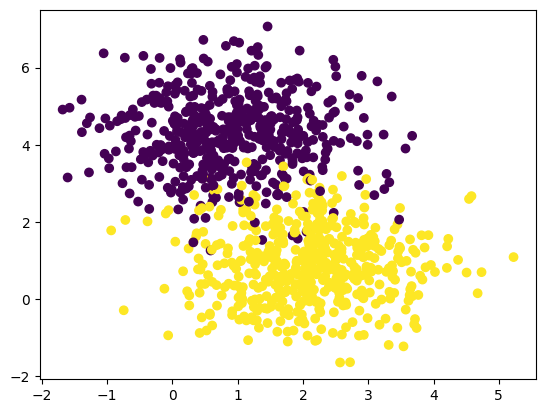

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model  = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.coef_, model.intercept_

(array([[ 0.76155547, -3.02812325]]), array([6.87210192]))

In [ ]:
x1_sample = np.linspace(-6,7)

In [ ]:
colors = ["red", "blue"]
y_colors = list(map(lambda c: colors[c],y))

In [ ]:
y_colors[:5], y[:5]

(['red', 'red', 'red', 'blue', 'blue'], array([0, 0, 0, 1, 1]))

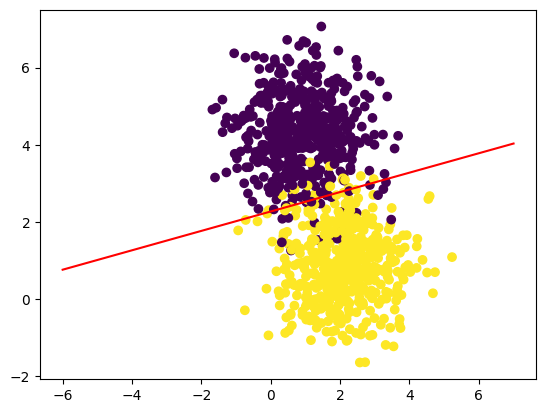

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

for i , (coef,intercept) in enumerate(zip(model.coef_,model.intercept_)):
  x2_sample = -coef[0]/coef[1] * x1_sample - intercept /coef[1]
  plt.plot(x1_sample,x2_sample,color = colors[i])

In [ ]:
model.score(X_train,y_train)

0.9597014925373134

#Custom Logistic Regression

In [ ]:
class LogisticRegCustom:
  #constructor
  def __init__(self, lr = 0.003,iters = 1000):
    self.lr = lr
    self.iters = iters
    self.coef_  = []

  def fit(self,X,y):
    self._X = np.hstack([np.ones([len(X), 1]), X])
    self._y = y
    rows,columns = self._X.shape
    for i in range(columns):
      self.coef_.append(0)
    print(self.coef_)
    self.gradient_ascend()

  def gradient_ascend(self):
    for _ in range(self.iters):
      for j in range(len(self.coef_)):
        coef = self.coef_[j]
        coef = coef + self.lr*(self.gradient(j))
        self.coef_[j] = coef
      #print(coef)

  def gradient(self,j):
    summation = 0
    for i in range(self._X.shape[0]):
      ya = self._y[i]
      yh = self.hypothesis(self._X[i])
      diff = (ya-yh)
      summation += diff*self._X[i,j]
    return summation

  def hypothesis(self,X):
    z = 0
    for i in range(len(self.coef_)):
      z += self.coef_[i] * X[i]

    sigmoid  = 1/(1+(math.e**(-z)))
    return sigmoid

  def predict(self,X):
    X = np.hstack([np.ones([len(X), 1]), X])
    prediction = []
    for row in X:
      if self.hypothesis(row) >=0.5:
        prediction.append(1)
      else:
        prediction.append(0)
    return prediction



In [ ]:
customModel = LogisticRegCustom()
customModel.fit(X_train,y_train)

[0, 0, 0]


In [ ]:
customModel.coef_
#sllearn coeff = [6.87210192, 0.76155547, -3.02812325]

[7.564026311215729, 0.8293545562948105, -3.3237075696382687]

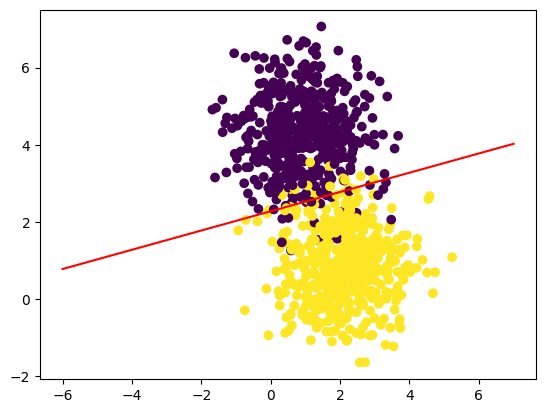

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

for i , (coef,intercept) in enumerate(zip(np.array([customModel.coef_[1:]]),np.array([customModel.coef_[0]]))):
  x2_sample = -coef[0]/coef[1] * x1_sample - intercept /coef[1]
  plt.plot(x1_sample,x2_sample,color = colors[i])

In [80]:
customModelOutput = customModel.predict(X_test)
print("Custom Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, customModelOutput)*100)


Custom Logistic Regression model accuracy(in %): 96.06060606060606
